In [1]:
from PIL import Image
import xml.etree.ElementTree as ET
import re as re
import imageio as imageio

In [2]:
class VARIABLE:
    def __init__(self):
        self.name = ''
        self.value = 0

def Variable2Dict(Variable):
    '''Takes a list of objects of class VARIABLE and returns the data in a dictionary
    return varDict'''
    varDict = {vari.name: vari.value for vari in Variable}
    return varDict


In [127]:
im = Image.open("magAtoms_46.png")

In [128]:
info = im.info
print(info["Settings"])

<?xml version="1.0" encoding="ISO8859-1" standalone="no" ?>
<controlconfig>

  <image>
    <name>magAtoms</name>
    <camera>Camera_Mag</camera>
    <shutteroff>0</shutteroff>
    <sequencelength>1</sequencelength>
    <acquisitionmode>0</acquisitionmode>
    <exposuretime>0.001</exposuretime>
    <isregionofinterest>0</isregionofinterest>
    <offsetx>0</offsetx>
    <offsety>0</offsety>
    <sizex>640</sizex>
    <sizey>480</sizey>
    <detuning>0</detuning>
    <sigma0>2.807E-13</sigma0>
    <custom>0</custom>
    <numofcomponents>1</numofcomponents>
    <toftime>0.0</toftime>
    <trapfreqx></trapfreqx>
    <trapfreqy></trapfreqy>
    <trapfreqz></trapfreqz>
    <mass>1.4446686951E-25</mass>
    <historyscale>1</historyscale>
    <historyoffset>0</historyoffset>
    <fits/>
  </image>

</controlconfig>



In [226]:
print(info["dpi"])

(4233.3164, 4233.3164)


In [130]:
stt = ET.fromstring(info["Settings"])
ctr = ET.fromstring(info["Control"])
ctr

<Element 'controlconfig' at 0x000001907B225E90>

In [131]:
stt.find('.//camera').text

'Camera_Mag'

In [132]:
varis = ctr.find('.//variables')
varis

<Element 'variables' at 0x000001907FCC0130>

In [133]:
vind1 = [m.start() for m in re.finditer("<variable>\n      <name>", info["Control"])]
vind2 = [m.start() for m in re.finditer("</name>\n      <value>", info["Control"])]


In [134]:
numVars = len(vind1)
numVars

219

In [3]:
import os
path = os.getcwd()
import glob as glb
import numpy as np
import scipy.signal as spsig
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
import processing.ImgProc as IP
from processing.load import ReadImage
import numpy as np


In [6]:
dark, bright, atoms = "magDark_46.png", "magBright_46.png", "magAtoms_46.png"


In [7]:
m = IP.Meassurement(dark, bright, atoms, "MagTrap", 1.2, pixelSize = 7.5e-6)

In [8]:
m.cropImage()

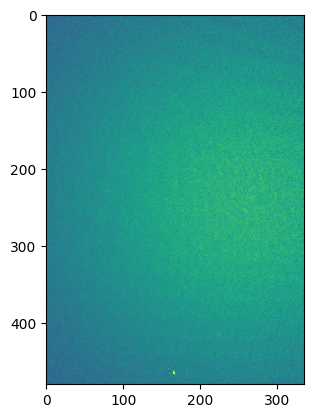

In [12]:
plt.imshow(m.ROI, vmax = 1)

In [13]:
m.FitROI()

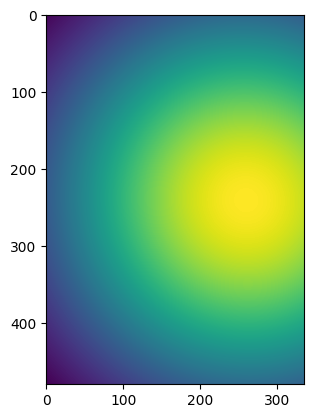

In [14]:
plt.imshow(m.fitted_image)

In [15]:
m.calculateResults()

In [16]:
m.results

{'Fitted Atom Number': 7094268.791126637,
 'Integrated Atom Number': 7094268.803353049,
 'Temperature': 4.359612838457489e-05}

In [13]:
(m.pcov[3]*m.effectivePS)**2/m.variables["ToFTime"]**2

array([7.50342081e-12, 1.49198281e-08, 1.80884588e-10, 9.58636777e-07,
       1.06961350e-06, 2.38333865e-10, 9.12654086e-12])

In [15]:
m.popt[3]

195.64663523788997

In [38]:
m

In [39]:
%pip install h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
    --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:07
   ----- ---------------------------------- 0.4/3.0 MB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 1.2/3.0 MB 6.8 MB/s eta 0:00:01
   ---------------------------- ----------- 2.2/3.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\iperez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
def props(cls):   
  return [i for i in cls.__dict__.keys() if i[:1] != '_']

properties = props(m)

In [41]:
properties

['variables',
 'pixelSize',
 'camera',
 'effectivePS',
 'magnification',
 'meas',
 'ROI_size',
 'OpDen',
 'center',
 'ROI',
 'popt',
 'pcov',
 'fitted_image',
 'fitStatus',
 'results']

In [ ]:
#variables, #Opden, #center, #ROI, #popt, #pcov, #fitted_image, #fitStatus, results

In [ ]:
def saveData(data):
    

In [52]:
import h5py
import pickle
intermediate_results = {}
intermediate_results["OpDen"] = m.OpDen
intermediate_results["Center"] = m.center
intermediate_results["popt"] = m.popt
intermediate_results["pcov"] = m.pcov

dataSet = {}
dataSet["Iteration"] = 0
dataSet["Fitted_Image"] = m.fitted_image
dataSet["fitStatus"] = m.fitStatus
dataSet["ROI"] = m.ROI
dataSet["results"] = m.results
dataSet["Intermediate results"] = intermediate_results




In [55]:
fileName = "saved_data.pkl"

if os.path.exists(fileName):
    with open(fileName, 'rb+') as f:
        try:
            f.seek(0)
            existing_data = pickle.load(f)
        except EOFError:
            existing_data = []
        existing_data.append(dataSet)
        f.seek(0)
        pickle.dump(existing_data, f)

In [67]:
pathImage = "Test\\magAtoms.png"
filename = os.path.basename(pathImage)
    
    # Match the pattern to isolate the identifier (assumes format ends with "_[identifier].png")
match = re.search(r'_(\d+)\.png$', filename)
    


In [68]:
filename

'magAtoms.png'

In [69]:
m.variables

{'MOTLoadingTime': 11.0,
 'CMOTRampTime': 0.006,
 'CMOTHoldTime': 0.001,
 'MOTCurrent': 13.0,
 'CMOTCurrent': 11.0,
 'MOTDetuningCooler': -6.7,
 'CMOTDetuningCooler': -3.0,
 'MOTDetuningRepumper': -2.7,
 'CMOTDetuningRepumper': -0.8,
 'MOTIntensityCooler': 0.99,
 'MOTIntensityRepumper': 0.99,
 'CMOTIntensityCooler': 0.05,
 'CMOTIntensityRepumper': 0.001,
 'D1Intensity': 1.0,
 'MolassesDetuning': 4.7,
 'PushDetuning': 5.3,
 'ToFTime': 0.013,
 'ExposureTime': 5e-05,
 'ProbeDetuning': 1.8,
 'fitingTime': 3.0,
 'Molasses1Time': 0.005,
 'MolassesRampTime': 0.003,
 'MolassesRampD1Intensity': 0.2,
 'OP2': 0.0002,
 'OP1': 0.00025,
 'OPD1Detuning': 5.5,
 'MagTrapCompressionTime': 1.0,
 'MagTrapDecompressionTime': 0.5,
 'MagTrapCatchCurrent': 35.0,
 'MagTrapCompressedCurrent': 180.0,
 'MagTrapDecompressedCurrent': 30.0,
 'MagTrapCatchTime': 0.015,
 'MagTrapThermTime': 0.1,
 'OP3': 0.00025,
 'MagTrapCleaningTime': 0.1,
 'MagTrapCleaningCurrent': 22.0,
 'MagTrapCleaningRampTime': 0.1,
 'YAGPower':

In [71]:
fileName = "saved_data.pkl"
with open(fileName, 'rb+') as f:
    print(f.seek(0))

0


In [ ]:
np.max(m.ROI), np.max()

23.025850929940457

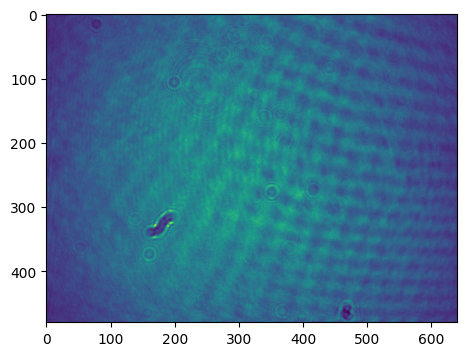

In [94]:
image = plt.imread("magAtoms_46.png")
image /= np.max(image)
figure, ax = plt.subplots(figsize=(6, 4))
colormap = "viridis"
norm_value = 1
ax.imshow(image, cmap=colormap, vmin = 0, vmax = norm_value)

In [19]:
from processing.SaverLoader import saveData, LoadData

In [18]:
saveData(m, "46","" )

In [24]:
data = LoadData("")
image = data[-1]["ROI"]

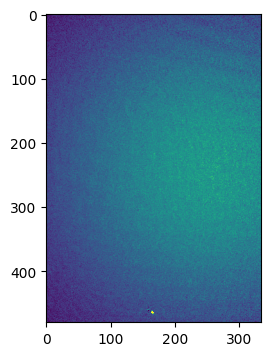

In [33]:
figure, ax = plt.subplots(figsize=(6, 4))
colormap = "viridis"
norm_value = 0.04
ax.imshow(image/np.max(image), cmap=colormap, vmin = 0, vmax = norm_value)
        